# Extending Python 3.7s Data Classes

**Geir Arne Hjelle**, `@gahjelle`

[![](real-python_data-classes.png)](https://realpython.com/python-data-classes/)

Let's dive right in, with an example of a data class:

In [1]:
from dataclasses import dataclass

@dataclass
class Card:
    suit: str
    rank: str

The data class can be used as follows:

In [2]:
c = Card("♠", "A")
c

Card(suit='♠', rank='A')

In [3]:
c.suit

'♠'

In [5]:
c == Card("♢", "A")

False

Data classes:

- Are just regular classes


- Are new in the standard library in Python 3.7
    - You can `pip install dataclasses` in Python 3.6


- Are inspired by the `attrs` project (and `namedtuple`, `namedlist`, `attrdict`, `plumber`, ...)

- Provide a way to simplify class definitions
    - The `@dataclass` decorator writes a lot of code, so you don't have to

Compare with the regular definition of a class:

In [6]:
class OldCard:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

Not so bad... Let's use it:

In [7]:
oc = OldCard("♡", "Q")
oc

In [8]:
oc.suit

'♡'

In [9]:
oc == OldCard("♡", "Q")

False

Data classes are providing some nice features behind the scenes!

By default, `@dataclass` provide:

- `.__init__()`

- `.__repr__()`

- `.__eq__()`
    

They can easily be configured to provide:

- ordering methods like `.__gt__()`, `.__ge__()` and so on

- `.__hash__()`

- immutability

Another example:

In [10]:
@dataclass
class Coordinate:
    x: float
    y: float
    z: float
    t: float

In [11]:
p = Coordinate(1, 0, 0, 0)
q = Coordinate(0, 1, 2, 3)
p, q

(Coordinate(x=1, y=0, z=0, t=0), Coordinate(x=0, y=1, z=2, t=3))

In [12]:
p == q

False

In [13]:
p > q

TypeError: '>' not supported between instances of 'Coordinate' and 'Coordinate'

Let's add ordering:

In [14]:
@dataclass(order=True)
class Coordinate:
    x: float
    y: float
    z: float
    t: float

In [15]:
p = Coordinate(1, 0, 0, 0)
q = Coordinate(0, 1, 2, 3)
p, q

(Coordinate(x=1, y=0, z=0, t=0), Coordinate(x=0, y=1, z=2, t=3))

In [16]:
p > q

True

In [17]:
sorted([p, q])

[Coordinate(x=0, y=1, z=2, t=3), Coordinate(x=1, y=0, z=0, t=0)]

Data classes are not magic, though:

In [18]:
p + q

TypeError: unsupported operand type(s) for +: 'Coordinate' and 'Coordinate'

You can add methods and default values:

In [19]:
@dataclass(order=True)
class Coordinate:
    x: float
    y: float
    z: float
    t: float = 0
        
    def __add__(self, other):
        if other.__class__ is not self.__class__:
            return NotImplemented
        return self.__class__(self.x + other.x,
                              self.y + other.y,
                              self.z + other.z,
                              self.t + other.t)

In [20]:
p = Coordinate(1, 0, 0)
q = Coordinate(0, 1, 2)
p, q

(Coordinate(x=1, y=0, z=0, t=0), Coordinate(x=0, y=1, z=2, t=0))

In [21]:
p + q

Coordinate(x=1, y=1, z=2, t=0)

OK, what's with that `suit: str` notation?

In [ ]:
@dataclass
class Card:
    suit: str
    rank: str

Data classes use variable annotations (Python 3.6+) to indicate that an attribute belongs to the data class.

Typically, you'd let the annotation double as a type hint. But the annotation could be any valid Python expression ...

In [22]:
@dataclass
class Silly:
    foo: print("Hi there")
    bar: 42 = "EuroSciPy"
    nope = "nothing"

Hi there


In [23]:
s = Silly("stuff")
s

Silly(foo='stuff', bar='EuroSciPy')

In [25]:
s.nope

'nothing'

The `field` function gives you more control of how each field is defined:

In [26]:
from dataclasses import field

In [27]:
field?

Say you have a field dependent on other fields:

In [28]:
@dataclass
class Image:
    height: int
    width: int
    data: bytearray = field(init=False, repr=False)

In [29]:
img = Image(1000, 1500)
img

Image(height=1000, width=1500)

In [30]:
img.data

AttributeError: 'Image' object has no attribute 'data'

You can do extra initialization in `.__post_init__()`:

In [31]:
@dataclass
class Image:
    height: int
    width: int
    data: bytearray = field(init=False, repr=False)
        
    def __post_init__(self):
        self.data = bytearray(self.height * self.width)

In [32]:
img = Image(10, 20)
img

Image(height=10, width=20)

In [33]:
img.data

bytearray(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

Remember: Data classes are regular classes!
    
... so they play nicely with tools we already know:

In [34]:
import numpy as np

@dataclass
class Coordinate:
    position: np.ndarray
    time: np.ndarray

In [35]:
pos = np.cumsum(np.random.randint(0, 100, (5, 3)), axis=0) / 10
t = np.arange(0, 50, 10)

In [36]:
c = Coordinate(pos, t)
c

Coordinate(position=array([[ 4. ,  8.1,  0.6],
       [ 9.9, 17.1,  4.8],
       [17.1, 25.5, 14.5],
       [19. , 29.8, 18.3],
       [21.8, 30.8, 20.8]]), time=array([ 0, 10, 20, 30, 40]))

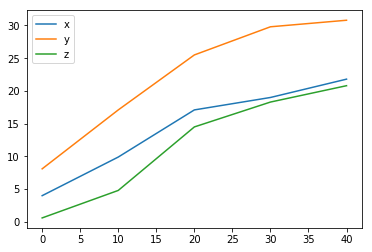

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(c.time, c.position)
plt.legend(("x", "y", "z"));

Data classes do not have explicit validators.

But you can use properties:

In [38]:
@dataclass
class Coordinate:
    position: np.ndarray
    time: np.ndarray
        
    def __len__(self):
        if hasattr(self, "_position"):
            return len(self._position)
        if hasattr(self, "_time"):
            return len(self._time)
        return 0

    @property
    def position(self):
        return self._position
    
    @position.setter
    def position(self, value):
        value = np.array(value)
        if len(self) and len(self) != len(value):
            raise ValueError("Position must have the same length as other fields")
        self._position = value
        
    @property
    def time(self):
        return self._time
    
    @time.setter
    def time(self, value):
        value = np.array(value)
        if len(self) and len(self) != len(value):
            raise ValueError("Time must have the same length as other fields")
        self._time = value

Let's try it out:

In [39]:
c = Coordinate(pos, range(3))

ValueError: Time must have the same length as other fields

In [40]:
c = Coordinate(pos, range(5))

In [41]:
c

Coordinate(position=array([[ 4. ,  8.1,  0.6],
       [ 9.9, 17.1,  4.8],
       [17.1, 25.5, 14.5],
       [19. , 29.8, 18.3],
       [21.8, 30.8, 20.8]]), time=array([0, 1, 2, 3, 4]))

# Thank you

[![](real-python_data-classes.png)](https://realpython.com/python-data-classes/)